# Linear Regression
## Normal Equation, Batch Gradient Descent, Mini-Batch Gradient Descent, Stochastic Gradient Descent

#### f(x) = 9 + 3x + 0.5x^2 + (error), where error is Gaussian noise with variance = 2 and sigma = 1. 

We build a three-feature linear regression model with different models and we verify them with the closed-form solution derived from the normal equations and NumPy's built-in polynomial regression function.

In [1]:
%matplotlib notebook
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# f(x) = 9 + 3x + 0.5x^2 + (error)
x1 = np.linspace(0,10, num=100) # m=100
exact = 9 + 3*x1 + 0.5*x1*x1
noisy = 9 + 3*x1 + 0.5*x1*x1 + 2*(np.random.randn(np.size(x1)) + 1)

w_summary = [[9, 5, 0.5]]

## Matrix Initialization

In [3]:
# feature matrix X contains bias, linear, quadratic terms; n=3
X = np.column_stack((np.ones(np.size(x1)), x1, np.square(x1))) # m*n feature matrix
X_T = np.transpose(X) # n*m
Y = noisy # m*1 target matrix

## Normal Equation

In [4]:
w = np.zeros(3) # n*1 parameter vector
w = np.dot(np.linalg.inv(np.dot(X_T, X)), np.dot(X_T, Y))
model_NE = w[0] + w[1]*x1 + w[2]*x1*x1
print('Normal Equation (analytically) ' + str(w))

w_summary.append(list(w))

Normal Equation (analytically) [10.13831074  3.38607675  0.4613689 ]


## Batch Gradient Descent

In [5]:
w = np.zeros(3) # n*1 parameter vector
rate = 0.0003 # learning rate
m = X.shape[0]

for iterations in range(0, 100000):

#     temp3=np.dot(X_T,X)
#     temp4=np.dot(X_T,Y)
#     descent = (np.dot(temp3,w) - temp4) # descent = (X_T*X*w-X_T*Y)    
#     if (np.linalg.norm(descent)<=0.0001):
#         print('The parameters are ' + str(w) + " after " + str(iterations) + " iterations of BGD.")
#         break

    descent = np.sum((np.dot(w, X_T) - Y) * X_T, axis=1)/m
    w = w - rate*descent

model_BGD = w[0] + w[1]*x1 + w[2]*x1*x1
print('Batch Gradient Descent ' + str(w) + ' after ' + str(iterations) + " iterations")

w_summary.append(list(w))

Batch Gradient Descent [9.7573625  3.54529452 0.44785122] after 99999 iterations


## Mini-Batch Gradient Descent

In [6]:
w = np.zeros(3) # n*1 parameter vector
rate = 0.009 # learning rate
m = X.shape[0]
b = 10

def make_batch(X_T, Y, b, i):
    new_X_T = X_T[:, i:i+b]
    new_Y = Y[i: i+b]
    return new_X_T, new_Y
    
for iterations in range(0, int(m/b)):
    new_X_T, new_Y = make_batch(X_T, Y, b, iterations)
    w = w - rate*np.sum((np.dot(w, new_X_T) - new_Y) * new_X_T, axis=1)/b
    
model_MBGD = w[0] + w[1]*x1 + w[2]*x1*x1
print('Mini-Batch Gradient Descent ' + str(w) + ' after ' + str(iterations) + " iterations")

w_summary.append(list(w))

Mini-Batch Gradient Descent [1.14383889 1.05325195 1.14081233] after 9 iterations


## Stochastic Gradient Descent

In [7]:
w = np.zeros(3) # n*1 parameter vector
rate = 0.0001 # learning rate
iterations = 0
for _ in range(0, 1000):
    for i in range (0, len(x1)):
        w = w - rate*np.dot(np.dot(w, X_T[:, i]) - Y[i], X_T[:, i])
        iterations += 1

model_SGD = w[0] + w[1]*x1 + w[2]*x1*x1
print('Stochastic Gradient Descent ' + str(w) + ' after ' + str(iterations) + " iterations")

w_summary.append(list(w))

Stochastic Gradient Descent [6.95414402 5.15805736 0.28383609] after 100000 iterations


## NumPy Polynomial Fit

In [8]:
from numpy.polynomial import polynomial as P
w = P.polyfit(x1, noisy, 2)
print('NumPy Polynomial Fit ' + str(w))

w_summary.append(list(w))

NumPy Polynomial Fit [10.13831074  3.38607675  0.4613689 ]


## Summary

In [9]:
from tabulate import tabulate

models = ['', 'Normal Equation', 'Batch Gradient Descent', 'Mini-Batch Gradient Descent', 'Stochastic Gradient Descent', 'NumPy Polynomial Fit']
for i in range(1, len(w_summary)):
    err = np.sum(np.square(noisy - (w_summary[i][0] + w_summary[i][1]*x1 + w_summary[i][2]*x1*x1)))
    w_summary[i].append(err)
    w_summary[i].insert(0, models[i])

print(tabulate(w_summary[1:], headers=['Model', 'w0', 'w1', 'w2', 'Error']))

Model                              w0       w1        w2      Error
---------------------------  --------  -------  --------  ---------
Normal Equation              10.1383   3.38608  0.461369    401.303
Batch Gradient Descent        9.75736  3.54529  0.447851    402.993
Mini-Batch Gradient Descent   1.14384  1.05325  1.14081   20435.9
Stochastic Gradient Descent   6.95414  5.15806  0.283836    590.897
NumPy Polynomial Fit         10.1383   3.38608  0.461369    401.303


## Plot

<IPython.core.display.Javascript object>


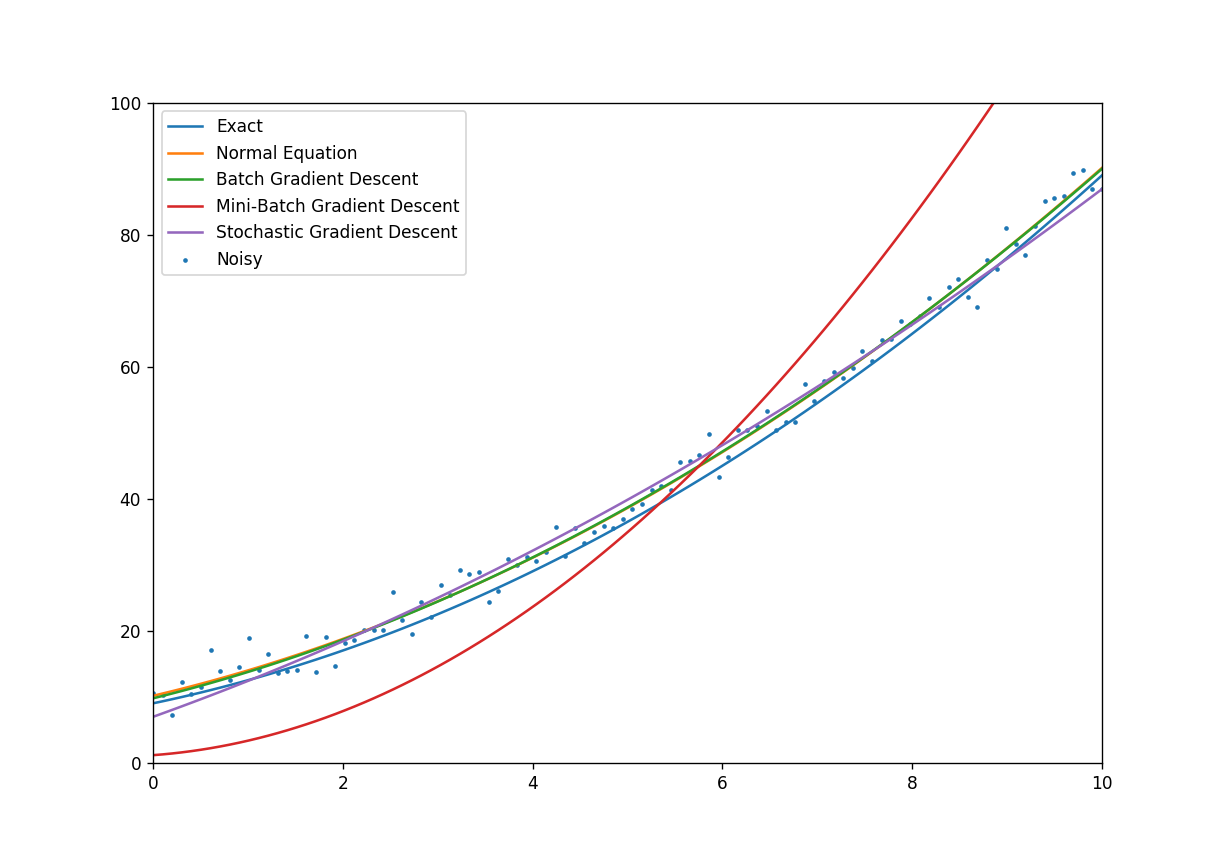

In [10]:
fig = plt.figure(figsize=(10, 7), facecolor='w', edgecolor='k', dpi=100)
ax1 = fig.add_subplot(111)
ax1.plot(x1, exact, label='Exact')
ax1.scatter(x1, noisy, s=3, label='Noisy')
plt.ylim(0,100)
plt.xlim(0,10)
ax1.plot(x1, model_NE, label='Normal Equation')
ax1.plot(x1, model_BGD, label='Batch Gradient Descent')
ax1.plot(x1, model_MBGD, label='Mini-Batch Gradient Descent')
ax1.plot(x1, model_SGD, label='Stochastic Gradient Descent')
plt.legend(loc='upper left')
plt.show()